# Investigation of the long-term CTI energy dependence for XMM-newton EPIC-pn

All the analysis is based on the long-term CTI curves as they appear in the CTI CCF.


In [147]:
import os
import numpy as np
import time

from astropy.io import fits
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style="white")

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
home = os.path.expanduser('~')
wdir = home + "/IVAN/ccfdev"

In [148]:
today = time.strftime("%c")
#
ccfdir = '/ccf/pub'
#ccf_file = f"{ccfdir}/EPN_CTI_0049.CCF"
ccf_file = f"{ccfdir}/EPN_CTI_0050.CCF"
hdu = fits.open(f"{ccf_file}")
ltc = hdu['LONG_TERM_CTI']
times = hdu['LTC_TIMES'].data["TIME"][0]

## PN long-term CTI in Small Window Mode

In [160]:
#
mode_id = 3 # Small Window mode
ix = np.where(ltc.data['MODE_ID'] == 3)[0]
xtab = ltc.data[ix]
e1 = xtab['ENERGY'][0]
loge1 = np.log10(e1)
tc1 = xtab['T_COEFF'][0]
e5 = xtab['ENERGY'][1]
loge5 = np.log10(e5)
tc5 = xtab['T_COEFF'][1]
e6 = xtab['ENERGY'][2]
loge6 = np.log10(e6)
tc6 = xtab['T_COEFF'][2]
#

In [161]:
#
# calculate Eobs/Elab using T_COEFF, assuming RAWY=190
#
# and introduce uncertainty as a fixed to 20 eV and the line energy
delta_e = [0.01,0.015,0.015] # in keV
uncrt1 = delta_e[0]/e1 # for Al Ka we set it to 10 eV
uncrt2 = delta_e[1]/e5
uncrt3 = delta_e[2]/e6
#
#uncrt1 = 0.001 # for Al Ka we set it to 10 eV
#uncrt2 = 0.001
#uncrt3 = 0.001
#uncrt1 = 0.005 # 0.5 %
q1 = np.power((1.0 - tc1)/(1.0-tc1[0]),190.0)
q1up = q1*(1+uncrt1)
q1up[np.where(q1up > 1.0)] = 1.0
q1do = q1*(1-uncrt1)
q1up[0] = 1
q1do[0] = 1
q2 = np.power((1.0 - tc5)/(1.0-tc5[0]),190.0)
q2up = q2*(1+uncrt2)
q2up[np.where(q2up > 1.0)] = 1.0
q2do = q2*(1-uncrt2)
q2up[0] = 1
q2do[0] = 1
q3 = np.power((1.0 - tc6)/(1.0-tc6[0]),190.0)
q3up = q3*(1+uncrt3)
q3up[np.where(q3up > 1.0)] = 1.0
q3do = q3*(1-uncrt3)
q3up[0] = 1
q3do[0] = 1

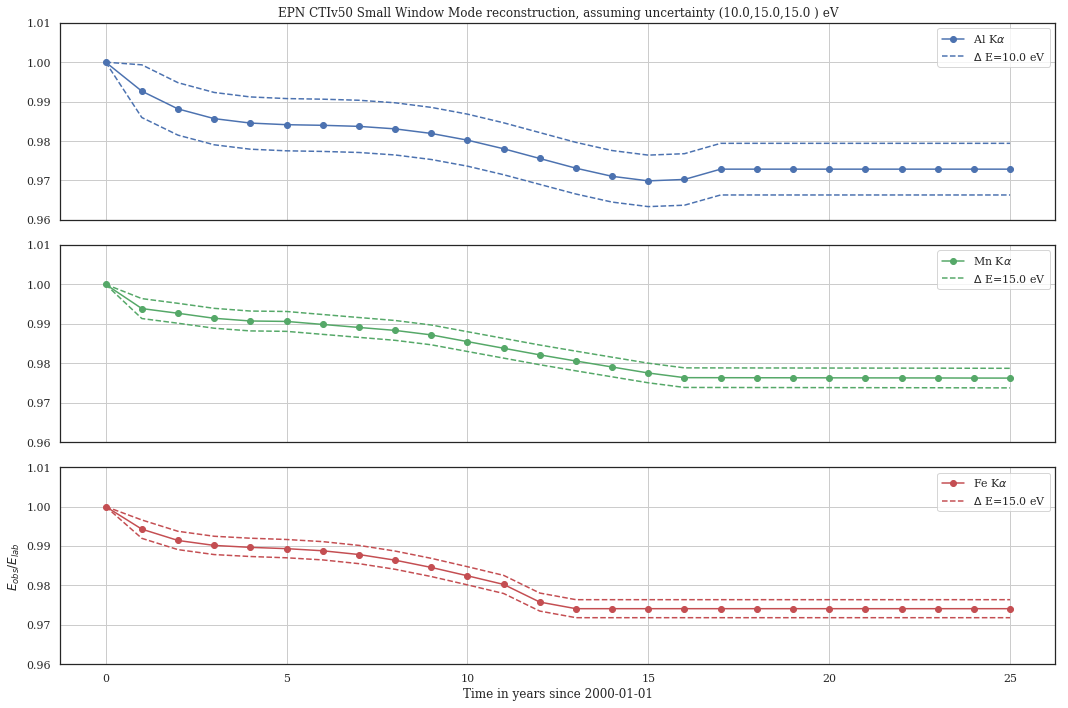

In [165]:
#
# plot the derived curves
#

fig, axs = plt.subplots(3,1,sharex=True,figsize=(15,10))
#uncrt = 0.01 # 5% uncertainty on values
axs[0].plot(times,q1,'bo-',label=r'Al K$\alpha$')
axs[0].plot(times,q1up,'b--',label=fr'$\Delta$ E={delta_e[0]*1000} eV')
axs[0].plot(times,q1do,'b--',label='')
axs[0].set_ylim([0.96,1.01])
#ax.plot(times,q1up,'--o',label='')
#ax.plot(times,q1down,'--o',label='')
axs[1].plot(times,q2,'go-',label=r'Mn K$\alpha$')
axs[1].plot(times,q2up,'g--',label=fr'$\Delta$ E={delta_e[1]*1000} eV')
axs[1].plot(times,q2do,'g--',label='')
axs[1].set_ylim([0.96,1.01])
#axs[0].plot(times,q1+q1*uncrt,'-o',label=r'Al K$\alpha$')
#ax.plot(times,q2up,'--o',label='')
#ax.plot(times,q2down,'--o',label='')
axs[2].plot(times,q3,'ro-',label=r'Fe K$\alpha$')
axs[2].plot(times,q3up,'r--',label=fr'$\Delta$ E={delta_e[2]*1000} eV')
axs[2].plot(times,q3do,'r--',label='')
axs[2].set_ylim([0.96,1.01])
#ax.plot(times,q3up,'--o',label='')
#ax.plot(times,q3down,'--o',label='')
#ax.text(xx[0],0.997,r'Al K$\alpha$',fontsize=16)
#ax.text(xx[1]-0.05,0.997,r'Mn K$\alpha$',fontsize=16)
#ax.text(xx[2]-0.01,0.997,r'Fe K$\alpha$',fontsize=16)
axs[2].set_xlabel("Time in years since 2000-01-01")
axs[2].set_ylabel(r"$E_{obs}/E_{lab}$")
#ax.set_ylim([0.86,1.01])
#ax.set_title(f"EPN CTIv50 energy dependence for Small Window Mode, assuming uncertainty {100*uncrt} %")
axs[0].legend()
axs[1].legend()
axs[2].legend()
#
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].set_title(f"EPN CTIv50 Small Window Mode reconstruction, assuming uncertainty ({delta_e[0]*1000},{delta_e[1]*1000},{delta_e[2]*1000} ) eV")
plt.subplots_adjust(wspace=0)
plt.tight_layout()
plt.savefig(f'{wdir}/pn_sw_ltcti_time_{today}.png',dpi=100)
plt.show();


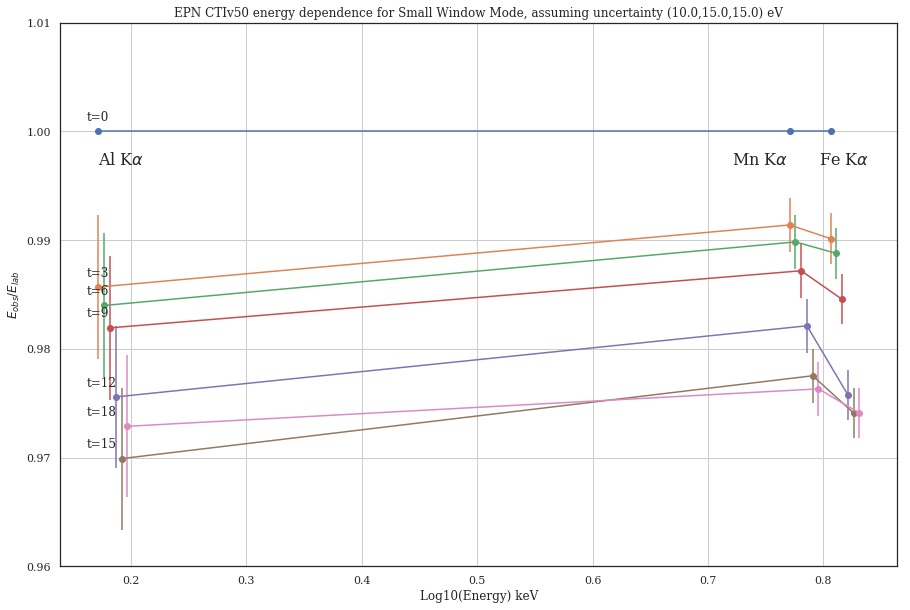

In [166]:
#
# plotting
#
fig, ax = plt.subplots(figsize=(15,10))
xx = np.array([loge1,loge5,loge6])
#uncrt = 0.01 # 5% uncertainty on values
kk = 0.0
for i in np.arange(19):
    if (i % 3 == 0):
        yy = np.array([q1[i],q2[i],q3[i]])
        yy_err1 = np.array([q1up[i],q2up[i],q3up[i]]) - yy
        yy_err2 = yy - np.array([q1do[i],q2do[i],q3do[i]])
        #
        if (i == 0):
            ax.plot(xx,yy,'-o')
        else:
            ax.errorbar(xx+kk,yy,yerr=(yy_err1,yy_err2),fmt='o',linestyle='solid')
            kk += 0.005
        #ax.errorbar(xx,yy,yerr=(yy2_err,yy2_err),fmt='o',linestyle='solid')
        #ax.plot([loge1,loge5,loge6],[q1[i],q2[i],q3[i]],'-o')        
        ax.text(loge1-0.01,q1[i]+0.001,f't={i}')
ax.text(xx[0],0.997,r'Al K$\alpha$',fontsize=16)
ax.text(xx[1]-0.05,0.997,r'Mn K$\alpha$',fontsize=16)
ax.text(xx[2]-0.01,0.997,r'Fe K$\alpha$',fontsize=16)
ax.set_xlabel("Log10(Energy) keV")
ax.set_ylabel(r"$E_{obs}/E_{lab}$")
ax.set_ylim([0.96,1.01])
ax.set_title(f"EPN CTIv50 energy dependence for Small Window Mode, assuming uncertainty ({delta_e[0]*1000},{delta_e[1]*1000},{delta_e[2]*1000}) eV")
ax.grid()
plt.savefig(f'{wdir}/pn_sw_ltcti_energy_{today}.png',dpi=100)
plt.show();

## PN long-term CTI in Full Frame Mode

In [168]:
ccfdir = '/ccf/pub'
ccf_file = f"{ccfdir}/EPN_CTI_0049.CCF"
#ccf_file = f"{ccfdir}/EPN_CTI_0050.CCF"
hdu = fits.open(f"{ccf_file}")
ltc = hdu['LONG_TERM_CTI']
times = hdu['LTC_TIMES'].data["TIME"][0]

In [169]:
#
mode_id = 0 # Small Window mode
ix = np.where((ltc.data['MODE_ID'] == mode_id) & (ltc.data['CCD_ID'] == 4))[0]
xtab = ltc.data[ix]
e1 = xtab['ENERGY'][0]
loge1 = np.log10(e1)
tc1 = xtab['T_COEFF'][0]
e5 = xtab['ENERGY'][1]
loge5 = np.log10(e5)
tc5 = xtab['T_COEFF'][1]
#

In [170]:
xtab

FITS_rec([(0, 4, 1.486 , [0.0007134 , 0.00075229, 0.00077612, 0.00078921, 0.00079527, 0.00079744, 0.00079826, 0.0007997 , 0.00080312, 0.0008093 , 0.00081844, 0.00083015, 0.00084343, 0.00085673, 0.00086787, 0.00087413, 0.00087215, 0.00085802, 0.00085802, 0.00085802, 0.00085802, 0.00085802, 0.00085802, 0.00085802, 0.00085802, 0.00085802], 1.),
          (0, 4, 5.8988, [0.00043236, 0.00045427, 0.0004688 , 0.0004784 , 0.00048517, 0.00049084, 0.00049676, 0.00050391, 0.00051291, 0.00052398, 0.000537  , 0.00055145, 0.00056646, 0.00058077, 0.00059278, 0.00060047, 0.00060148, 0.00059308, 0.00059308, 0.00059308, 0.00059308, 0.00059308, 0.00059308, 0.00059308, 0.00059308, 0.00059308], 1.)],
         dtype=(numpy.record, [('MODE_ID', 'u1'), ('CCD_ID', 'u1'), ('ENERGY', '>f4'), ('T_COEFF', '>f4', (26,)), ('SHIFT', '>f4')]))

In [171]:
#
# calculate Eobs/Elab using T_COEFF, assuming RAWY=190
#
# and introduce uncertainty as a fixed to 20 eV and the line energy
delta_e = [0.01,0.015] # in keV
uncrt1 = delta_e[0]/e1 # for Al Ka we set it to 10 eV
uncrt2 = delta_e[1]/e5
#
q1 = np.power((1.0 - tc1)/(1.0-tc1[0]),190.0)
q1up = q1*(1+uncrt1)
q1up[np.where(q1up > 1.0)] = 1.0
q1do = q1*(1-uncrt1)
q1up[0] = 1
q1do[0] = 1
q2 = np.power((1.0 - tc5)/(1.0-tc5[0]),190.0)
q2up = q2*(1+uncrt2)
q2up[np.where(q2up > 1.0)] = 1.0
q2do = q2*(1-uncrt2)
q2up[0] = 1
q2do[0] = 1

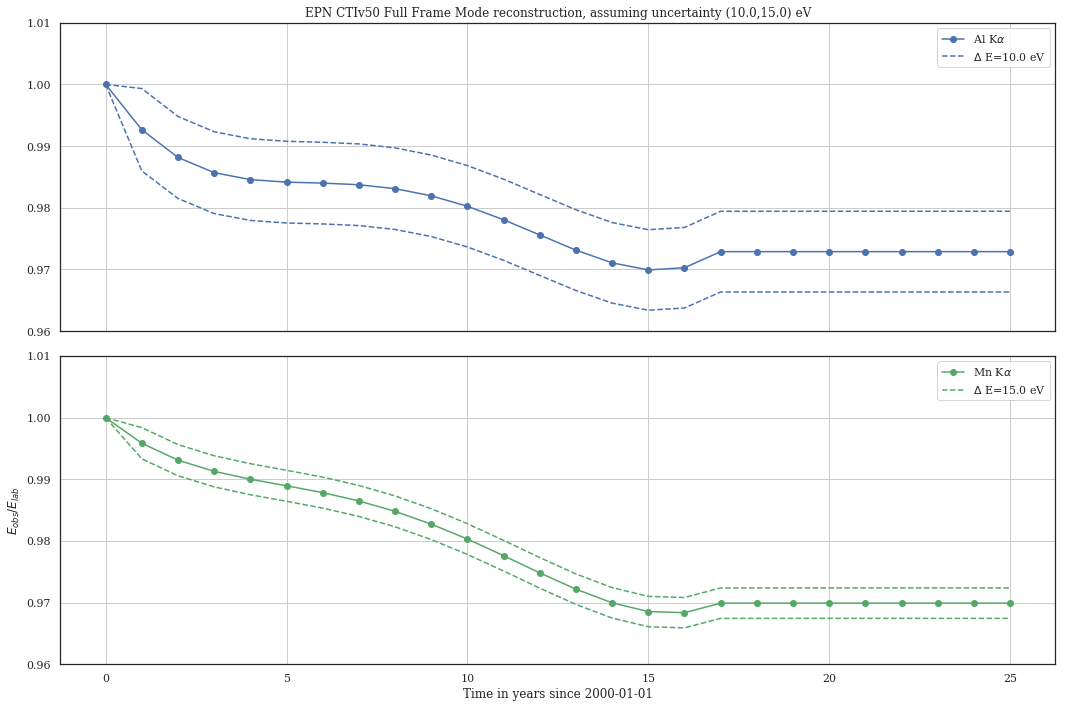

In [172]:
#
# plot the derived curves
#

fig, axs = plt.subplots(2,1,sharex=True,figsize=(15,10))
#uncrt = 0.01 # 5% uncertainty on values
axs[0].plot(times,q1,'bo-',label=r'Al K$\alpha$')
axs[0].plot(times,q1up,'b--',label=fr'$\Delta$ E={delta_e[0]*1000} eV')
axs[0].plot(times,q1do,'b--',label='')
axs[0].set_ylim([0.96,1.01])
#ax.plot(times,q1up,'--o',label='')
#ax.plot(times,q1down,'--o',label='')
axs[1].plot(times,q2,'go-',label=r'Mn K$\alpha$')
axs[1].plot(times,q2up,'g--',label=fr'$\Delta$ E={delta_e[1]*1000} eV')
axs[1].plot(times,q2do,'g--',label='')
axs[1].set_ylim([0.96,1.01])
#axs[0].plot(times,q1+q1*uncrt,'-o',label=r'Al K$\alpha$')
#ax.plot(times,q2up,'--o',label='')
#ax.plot(times,q2down,'--o',label='')
axs[1].set_xlabel("Time in years since 2000-01-01")
axs[1].set_ylabel(r"$E_{obs}/E_{lab}$")
#ax.set_ylim([0.86,1.01])
#ax.set_title(f"EPN CTIv50 energy dependence for Small Window Mode, assuming uncertainty {100*uncrt} %")
axs[0].legend()
axs[1].legend()
#
axs[0].grid()
axs[1].grid()
axs[0].set_title(f"EPN CTIv50 Full Frame Mode reconstruction, assuming uncertainty ({delta_e[0]*1000},{delta_e[1]*1000}) eV")
plt.subplots_adjust(wspace=0)
plt.tight_layout()
plt.savefig(f'{wdir}/pn_ff_ltcti_time_{today}.png',dpi=100)
plt.show();


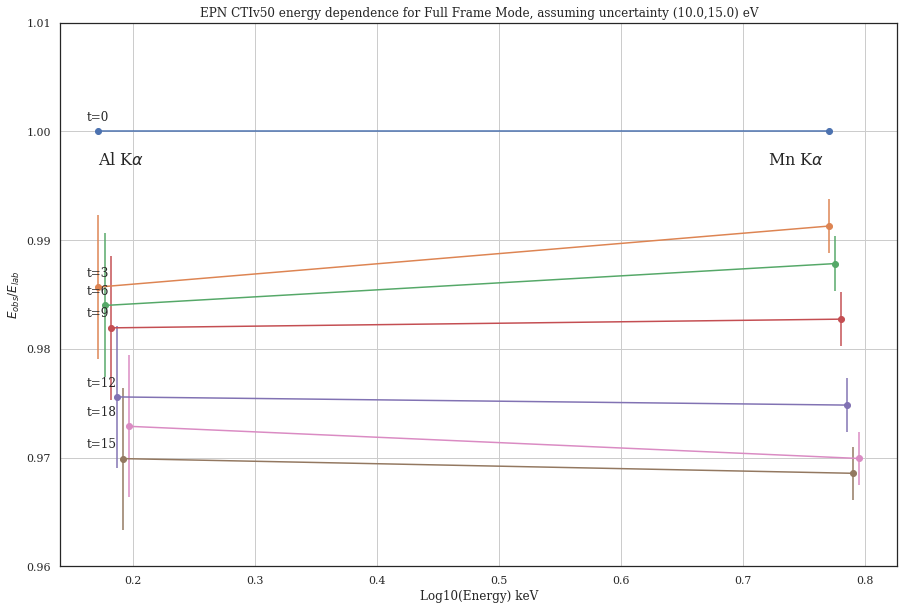

In [173]:
#
# plotting
#
fig, ax = plt.subplots(figsize=(15,10))
xx = np.array([loge1,loge5])
#uncrt = 0.01 # 5% uncertainty on values
kk = 0.0
for i in np.arange(19):
    if (i % 3 == 0):
        yy = np.array([q1[i],q2[i]])
        yy_err1 = np.array([q1up[i],q2up[i]]) - yy
        yy_err2 = yy - np.array([q1do[i],q2do[i]])
        #
        if (i == 0):
            ax.plot(xx,yy,'-o')
        else:
            ax.errorbar(xx+kk,yy,yerr=(yy_err1,yy_err2),fmt='o',linestyle='solid')
            kk += 0.005
        #ax.errorbar(xx,yy,yerr=(yy2_err,yy2_err),fmt='o',linestyle='solid')
        #ax.plot([loge1,loge5,loge6],[q1[i],q2[i],q3[i]],'-o')        
        ax.text(loge1-0.01,q1[i]+0.001,f't={i}')
ax.text(xx[0],0.997,r'Al K$\alpha$',fontsize=16)
ax.text(xx[1]-0.05,0.997,r'Mn K$\alpha$',fontsize=16)
ax.set_xlabel("Log10(Energy) keV")
ax.set_ylabel(r"$E_{obs}/E_{lab}$")
ax.set_ylim([0.96,1.01])
ax.set_title(f"EPN CTIv50 energy dependence for Full Frame Mode, assuming uncertainty ({delta_e[0]*1000},{delta_e[1]*1000}) eV")
ax.grid()
plt.savefig(f'{wdir}/pn_lw_ltcti_energy_{today}.png',dpi=100)
plt.show();
